In [17]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')


In [18]:
# Display basic information about the dataset
print("Shape of the dataset:", tips.shape)
print("\nColumns in the dataset:", tips.columns)
print("\nData types of columns:\n", tips.dtypes)



Shape of the dataset: (244, 7)

Columns in the dataset: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

Data types of columns:
 total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [19]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(tips.head())




First few rows of the dataset:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [20]:
# Summary statistics
print("\nSummary statistics:")
print(tips.describe())




Summary statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [21]:
# Check for missing values
print("\nMissing values:")
print(tips.isnull().sum())




Missing values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


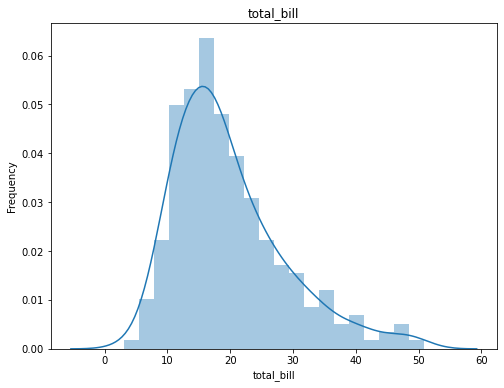

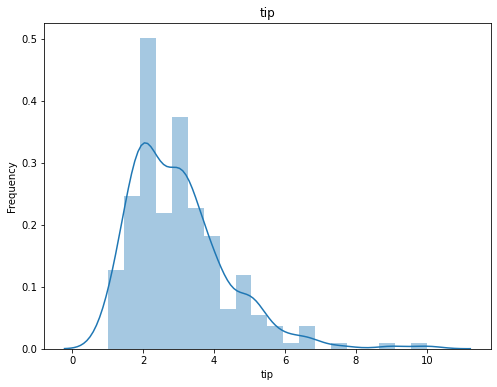

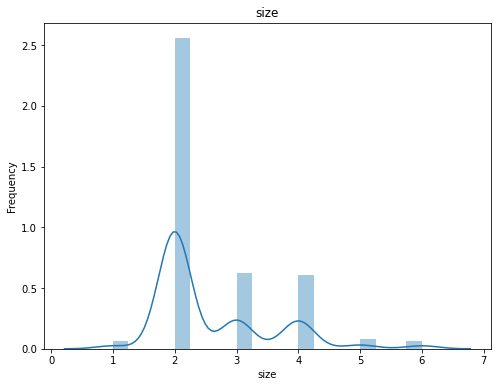

In [22]:
# Histograms for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.distplot(tips[col], kde=True, bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


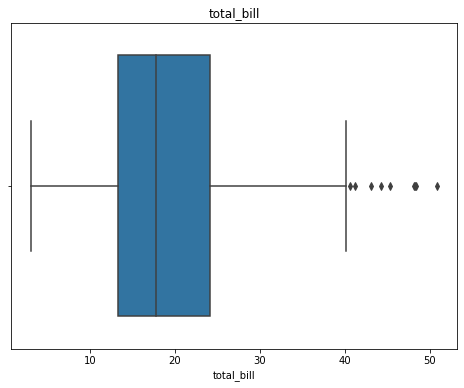

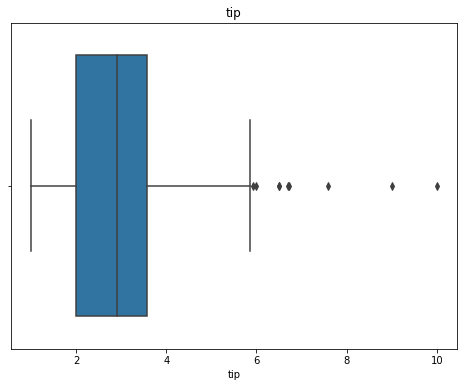

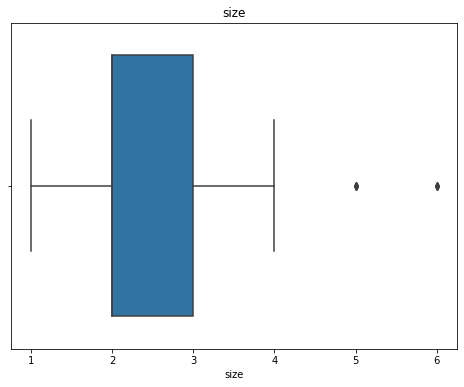

In [23]:
# Boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=tips[col])
    plt.title(col)
    plt.xlabel(col)
    plt.show()



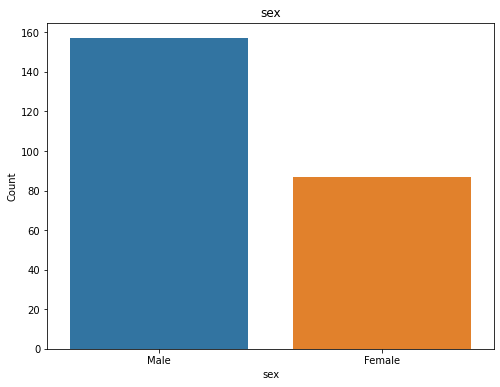

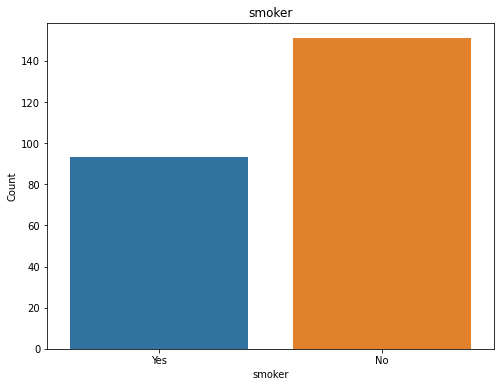

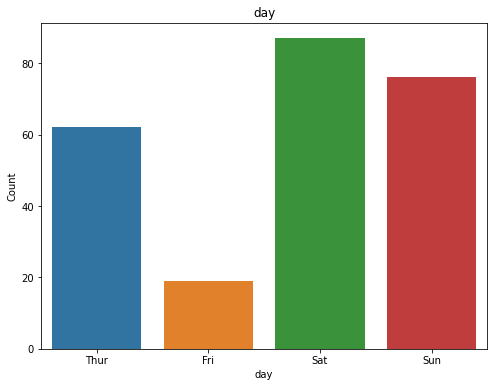

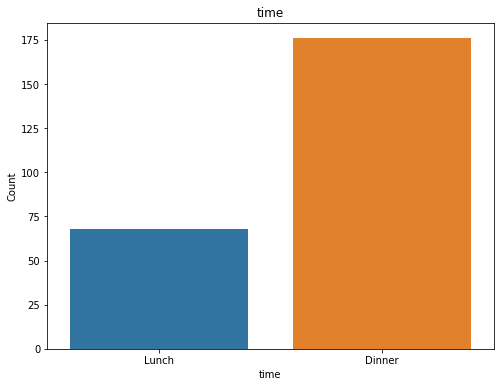

In [24]:
# Countplot for categorical columns
categorical_cols = tips.select_dtypes(include=['category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(tips[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

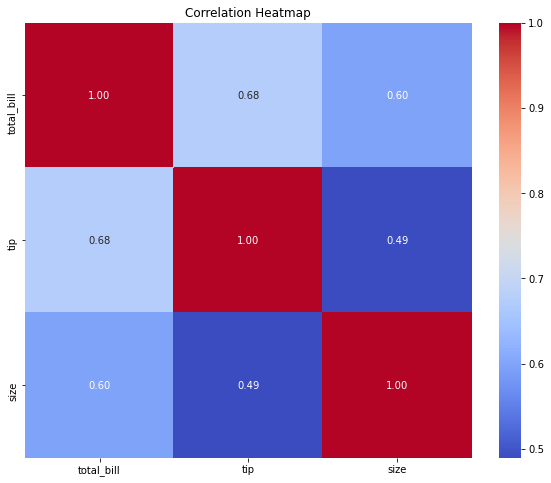

In [25]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(tips.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

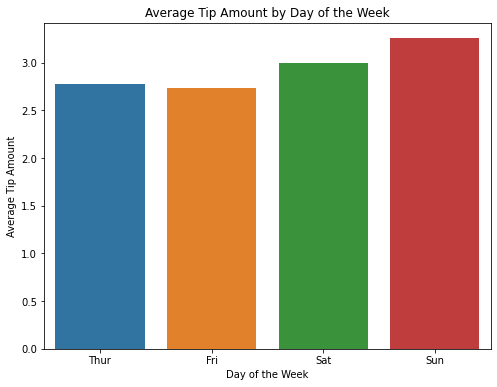

In [26]:

# Calculate the average tip amount by day of the week
average_tip_by_day = tips.groupby('day')['tip'].mean().reset_index()
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='tip', data=average_tip_by_day)
plt.title('Average Tip Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip Amount')
plt.show()


In [27]:
# Descriptive statistics
descriptive_stats = tips.describe()

print(descriptive_stats)

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           6.69e-34
Time:                        16:32:48   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

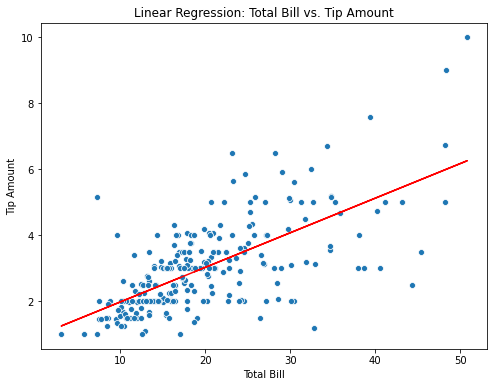

In [28]:
# Perform linear regression
X = sm.add_constant(tips['total_bill'])  # Add a constant term to the predictor
y = tips['tip']
model = sm.OLS(y, X)
results = model.fit()
# Print regression summary
print(results.summary())
# Plot the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.plot(tips['total_bill'], results.predict(), color='red')
plt.title('Linear Regression: Total Bill vs. Tip Amount')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()


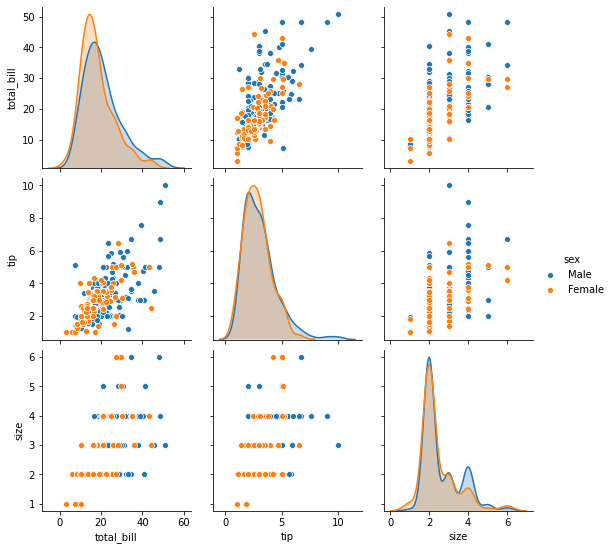

In [29]:
# Pairplot
sns.pairplot(tips, hue='sex')
plt.show()


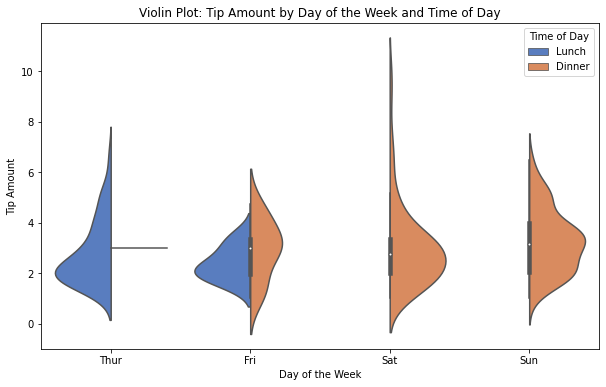

In [30]:
# Violin plot with categorical variables
plt.figure(figsize=(10, 6))
sns.violinplot(x='day', y='tip', hue='time', split=True, data=tips, palette='muted')
plt.title('Violin Plot: Tip Amount by Day of the Week and Time of Day')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')
plt.legend(title='Time of Day', loc='upper right')
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [38]:
# Convert categorical variables into dummy variables
print(tips.columns)


Index(['total_bill', 'tip', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes',
       'smoker_No', 'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch',
       'time_Dinner'],
      dtype='object')


In [39]:
# Split the data into features (X) and target variable (y)
X = tips.drop(columns='tip')
y = tips['tip']


In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [42]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [43]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.9619871369387765


In [44]:
tips['tip_percentage'] = tips['tip'] / tips['total_bill'] * 100


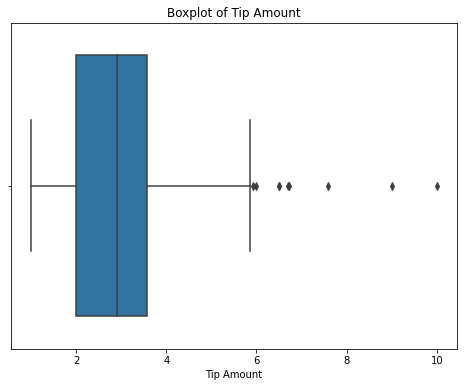

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='tip', data=tips)
plt.title('Boxplot of Tip Amount')
plt.xlabel('Tip Amount')
plt.show()


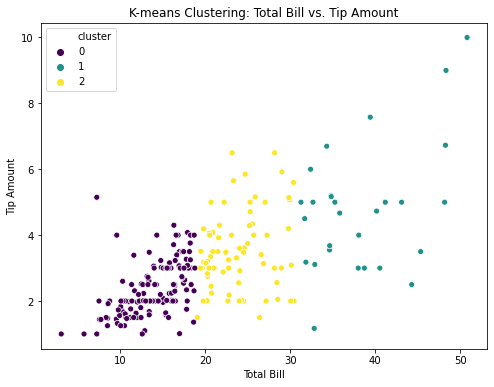

In [46]:
from sklearn.cluster import KMeans

# Select relevant features for clustering
X = tips[['total_bill', 'tip']]

# Initialize and fit K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
tips['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', hue='cluster', data=tips, palette='viridis')
plt.title('K-means Clustering: Total Bill vs. Tip Amount')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()
